In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config IPCompleter.greedy=True

pd.options.display.float_format='{:,.2f}'.format

In [2]:
df=pd.read_pickle('../cas3/df.pickle')
df

,usuario,sesion,categoria,evento,producto,precio,black_friday,san_valentin,date,año,mes,dia,hora,minuto,segundo,festivo_ru,festivo
fecha,,,,,,,,,,,,,,,,,
2019-10-01 00:01:46+00:00,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361,1487580005092295511,view,5843665,9.44,0,0,2019-10-01,2019,10,1,0,1,46,0,0
2019-10-01 00:01:55+00:00,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,1487580013069861041,cart,5868461,3.57,0,0,2019-10-01,2019,10,1,0,1,55,0,0
2019-10-01 00:02:50+00:00,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770,1487580006300255120,view,5877456,122.22,0,0,2019-10-01,2019,10,1,0,2,50,0,0
2019-10-01 00:03:41+00:00,555448072,b5f72ceb-0730-44de-a932-d16db62390df,1487580013749338323,view,5649270,6.19,0,0,2019-10-01,2019,10,1,0,3,41,0,0
2019-10-01 00:03:44+00:00,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5,1487580005411062629,view,18082,16.03,0,0,2019-10-01,2019,10,1,0,3,44,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29 23:58:49+00:00,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,cart,5815662,0.92,0,0,2020-02-29,2020,2,29,23,58,49,0,0
2020-02-29 23:58:57+00:00,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,view,5815665,0.59,0,0,2020-02-29,2020,2,29,23,58,57,0,0
2020-02-29 23:59:05+00:00,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,cart,5815665,0.59,0,0,2020-02-29,2020,2,29,23,59,5,0,0


# 1. Funcionamiento Customer Journey

In [3]:
eventos=df.evento.value_counts()
eventos

evento
view                961558
cart                574547
remove_from_cart    410357
purchase            127564
Name: count, dtype: int64

Creo kpis para evaluar como evolucionan las visitas de los clientes a la web.

In [4]:
kpi_visualizaciones_p = 100
kpi_carrito_p = eventos.loc['cart'] / eventos.loc['view'] * 100
kpi_abandono_p = eventos.loc['remove_from_cart'] / eventos.loc['cart'] * 100
kpi_compra_p = eventos.loc['purchase'] / eventos.loc['cart'] * 100

kpis = pd.DataFrame({'kpi':['visitas','carrito','compra'],
                     'valor':[kpi_visualizaciones_p,kpi_carrito_p,kpi_compra_p]})

kpis

,kpi,valor
0,visitas,100.00
1,carrito,59.75
2,compra,22.20


Conclusiones:

* Las tasas de partida son un 60% de carrito sobre visualiazaciones y un 22% de compra sobre carrito
* Por tanto existe un 40% de visitas sobre las que hay que trabajar para conseguir más carritos, y un 78% de carritos sobre los que trabajar para conseguir más compras

# 2.¿Cuántos productos se ven, se añaden al carro, se abandonan y se compran de media en cada sesión?

Conocer los principales kpis por sesión nos permite establecer la línea base para ir midiendo los resultados de las acciones de CRO.

In [5]:
sesion_prod=df.groupby(['sesion','evento']).producto.count()
sesion_prod=sesion_prod.unstack(level=0).fillna(0)
df.columns=df.columns.to_flat_index()

In [6]:
sesion_prod.sum()
#Estos valores coinciden con df.evento.value_counts()

sesion
0000597b-de39-4a77-9fe5-02c8792ca14e   3.00
0000645a-8160-4a3d-91bf-154bff0a22e3   2.00
000090e1-da13-42b1-a31b-91a9ee5e6a88   1.00
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b   1.00
0000de26-bd58-42c9-9173-4763c76b398e   1.00
                                       ... 
ffff6695-b64d-4a67-aa14-34b3b7f63c3f   2.00
ffff7d69-b706-4c64-9d6d-da57a04bc32b   1.00
ffff8044-2a22-4846-8a72-999e870abbe9   1.00
ffff91d4-7879-4a4b-8b26-c67915a27dc8   1.00
ffffbe0a-d2c2-47c7-afab-680bfdfda50d   1.00
Length: 446054, dtype: float64

In [7]:
sesion_prod.mean().sort_values(ascending=False)

sesion
9a00249a-68d3-426a-b434-f571adf843dd   698.25
6772c164-711e-4b0d-bfc8-a30fcca5a937   619.50
6bb9ee1d-29f0-40b3-acc1-bc248c299d49   600.50
774a7c64-079f-450c-be4a-625aeea3350d   507.75
15843513-b7d9-4fa4-8aed-42f39bb99767   426.00
                                        ...  
68646713-7497-475c-aff6-0cb273d6984b     0.25
68640f8f-9a28-4618-8d9a-5e5661f4e8aa     0.25
6863fa26-b943-457b-bb7e-85674d1bf9e7     0.25
6863ed76-aae3-4f91-b968-680bc4842963     0.25
ffffbe0a-d2c2-47c7-afab-680bfdfda50d     0.25
Length: 446054, dtype: float64

Conclusión:

En cada sesión, de media:

* Se ven 2.2 productos
* Se añaden 1.3 productos al carrito
* Se eliminan 0.9 productos del carrito
* Se compran 0.3 productos

Estos son los números que se deben incrementar con las acciones de CRO.

# 3. ¿Existen diferencias entre los eventos por horas?

<Axes: xlabel='hora'>

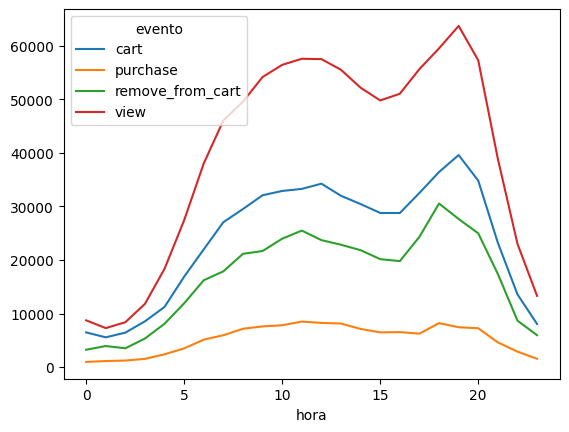

In [11]:
eventos_hora=df.groupby(['evento','hora']).producto.count().unstack().T
eventos_hora.plot()

Existe un patrón común para los diferentes eventos, aun que en diferentes intensidades

Poseen todos una concentración entre las 8-15h y un máximo a las 19h. 

creo una nueva variable que sea el ratio de compras por visita en cada hora.

In [13]:
eventos_hora['compras_visitas'] = eventos_hora.purchase / eventos_hora.view * 100
eventos_hora

evento,cart,purchase,remove_from_cart,view,compras_visitas
hora,,,,,
0,6475,962,3238,8731,11.02
1,5555,1128,3930,7280,15.49
2,6433,1220,3509,8378,14.56
3,8544,1535,5331,11807,13.00
4,11242,2389,8095,18365,13.01
5,16890,3491,11913,27438,12.72
6,21993,5125,16223,38055,13.47
7,27069,5951,17883,46072,12.92
8,29526,7158,21156,49587,14.44


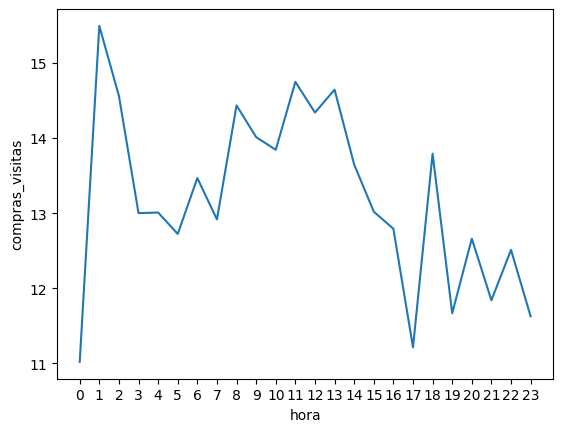

In [19]:
f,ax=plt.subplots()
ax.plot(eventos_hora.index,eventos_hora.compras_visitas)
plt.xticks(eventos_hora.index)
plt.xlabel('hora')
plt.ylabel('compras_visitas');

Conclusiones:
    
* Las horas en las que la gente compra más son la 1, las 8, de 11 a 13 y las 18
* Las horas en las que la gente no compra son las 24, de 3 a 7, de 14 a 17 y de 19 a 23

Analizo ahora no de forma proporcional, si no en absoluto si existen o no horas más frecuentes para cada tipo de evento.

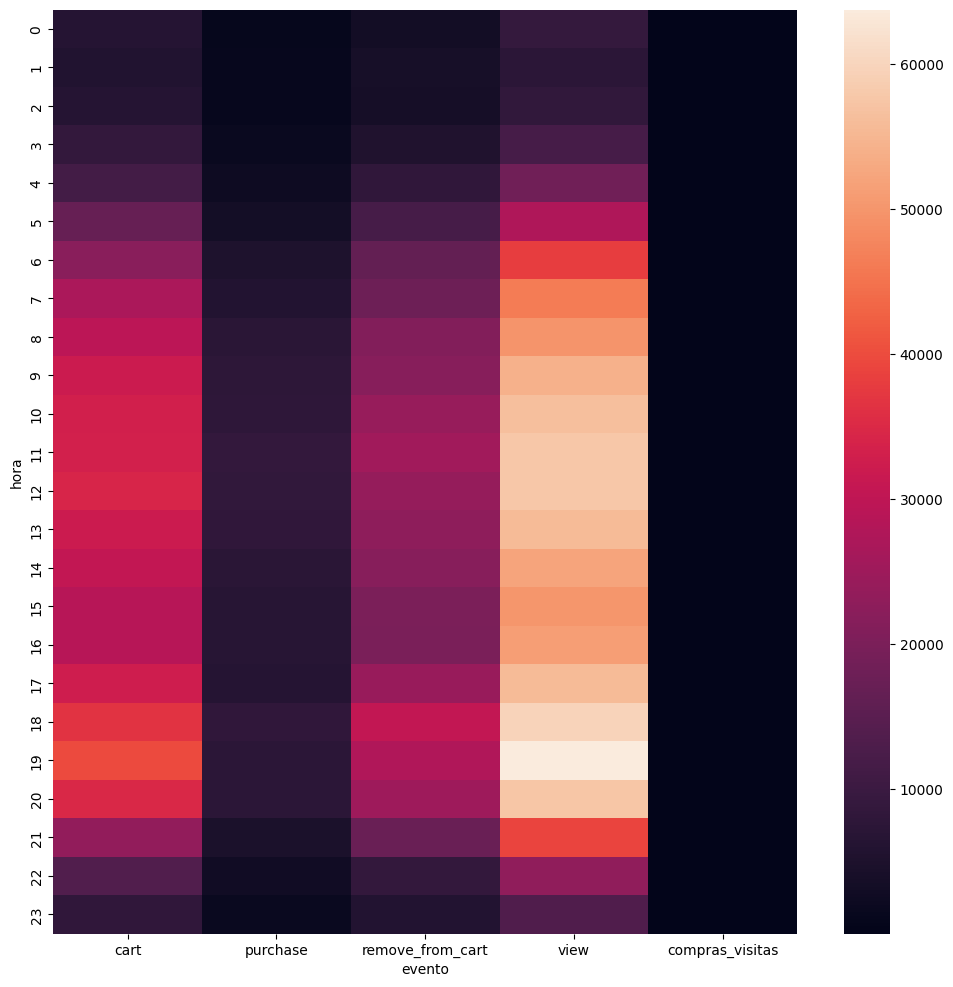

In [20]:
plt.figure(figsize = (12,12))
sns.heatmap(data = eventos_hora);

Hay diferentes escalas en las variables, es por eso que es necesario tipificar. para poder hacer una comparativa entre ellas.

In [21]:
def tipificar(variable):
    media=variable.mean()
    dt=variable.std()
    return(variable.apply(lambda x:(x-media)/dt))

In [22]:
eventos_hora_tipificada=eventos_hora.apply(tipificar)
eventos_hora_tipificada

evento,cart,purchase,remove_from_cart,view,compras_visitas
hora,,,,,
0,-1.56,-1.62,-1.63,-1.60,-1.83
1,-1.64,-1.56,-1.54,-1.68,1.91
2,-1.56,-1.53,-1.59,-1.62,1.13
3,-1.37,-1.41,-1.38,-1.45,-0.17
4,-1.13,-1.09,-1.06,-1.11,-0.17
5,-0.63,-0.68,-0.61,-0.65,-0.41
6,-0.17,-0.07,-0.10,-0.10,0.22
7,0.28,0.24,0.09,0.31,-0.24
8,0.50,0.69,0.48,0.49,1.03


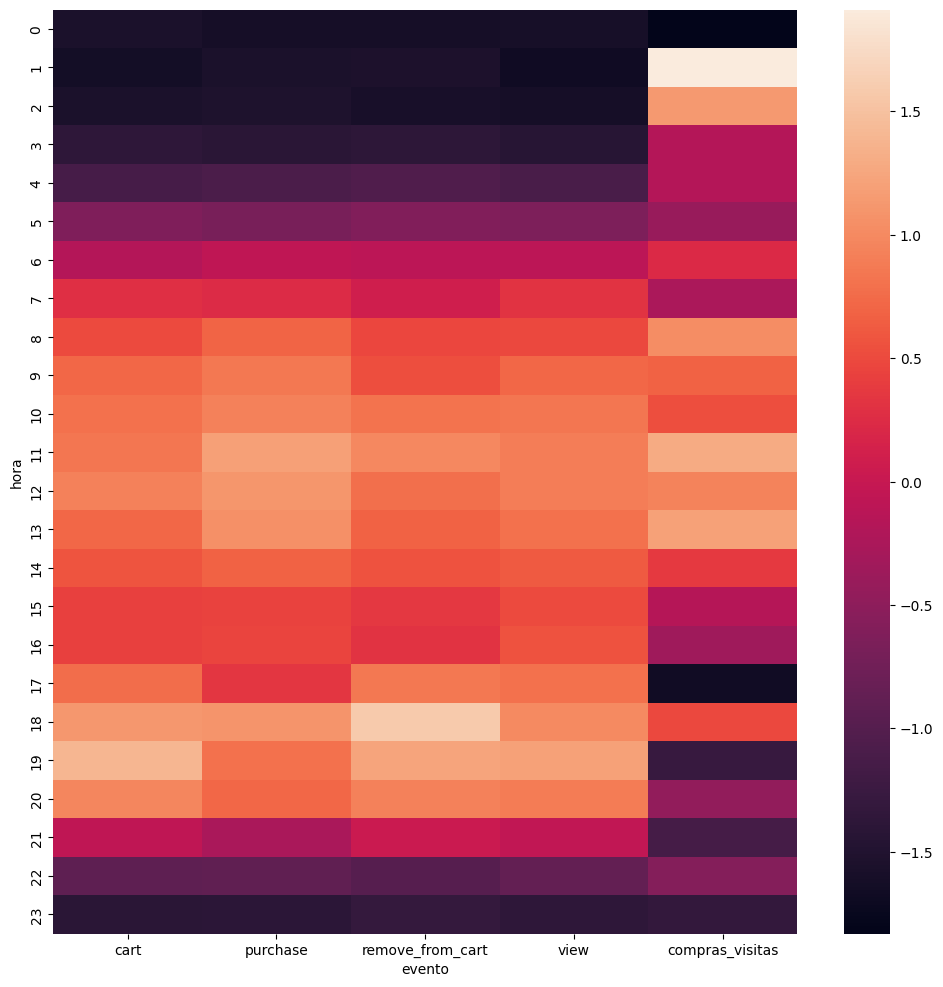

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(eventos_hora_tipificada);

Conclusiones:
## **INSIGHT #1**: Todas las métricas se maximzan en las franjas entre las 9 y las 13 y entre las 18 y las 20
* Esta info es muy relevante por ejemplo de cara a contratación de anuncios.
* Además, parece haber algún subtipo de usuario que compra a la 1 de la mañana, que aunque no sea muy frecuente sí compra mucho

# 4. ¿Cuál es la media de facturación?

In [28]:
df.loc[df.evento=='purchase'].precio.sum()
#Facturación anual

621549.6

In [29]:
df.loc[df.evento=='purchase'].groupby('mes').precio.sum()

mes
1    135,174.45
2    121,330.67
10   116,519.04
11   146,491.24
12   102,034.20
Name: precio, dtype: float64

# 5. ¿Cual es la tendencia de compras a nivel semanal?

In [34]:
tendencia=df.groupby('evento').resample('W').evento.count().unstack().T
tendencia

evento,cart,purchase,remove_from_cart,view
fecha,,,,
2019-10-06 00:00:00+00:00,31483,4440,14647,36353
2019-10-13 00:00:00+00:00,28151,5422,17989,44410
2019-10-20 00:00:00+00:00,23920,5033,15303,39486
2019-10-27 00:00:00+00:00,25651,5665,18411,40383
2019-11-03 00:00:00+00:00,24087,5746,16491,39365
2019-11-10 00:00:00+00:00,29142,6663,24008,46177
2019-11-17 00:00:00+00:00,25335,5141,17215,41170
2019-11-24 00:00:00+00:00,38069,9754,27973,56477
2019-12-01 00:00:00+00:00,31994,7493,23106,48883


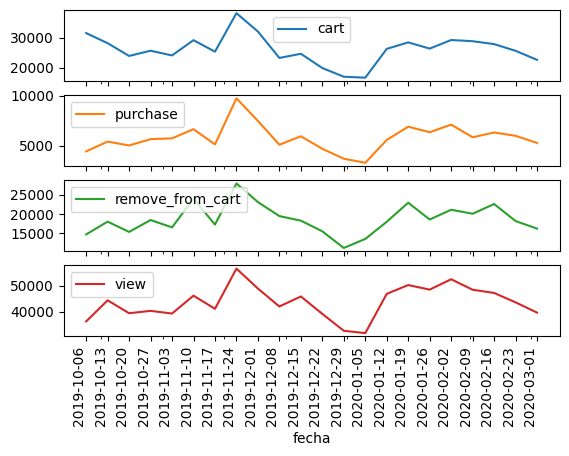

In [43]:
tendencia.plot(subplots=True,sharex=True,x_compat=True,rot=90)
plt.xticks(tendencia.index);

La tendencia es plana en todas las métricas, lo que confirma la necesidad de las acciones de CRO.



### **INSIGHT #2** Existe un pico significativo en la semana del 24, obviamente por black friday. Además las semanas previas a Navidad las compras descienden, claramente los compradores han adelantado sus compras.

# 6. Momentos del día(horas) que se producen mayor número de compras?

Util para focalizar las campañas.

In [48]:
compras_dia_hora=df.loc[df.evento=='purchase'].groupby(['date','hora']).evento.count().unstack(0).fillna(0)
compras_dia_hora

date,2019-10-01,2019-10-02,2019-10-03,2019-10-04,2019-10-05,2019-10-06,2019-10-07,2019-10-08,2019-10-09,2019-10-10,...,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29
hora,,,,,,,,,,,,,,,,,,,,,
0,13.00,18.00,1.00,2.00,0.00,0.00,0.00,0.00,3.00,23.00,...,28.00,0.00,0.00,0.00,0.00,55.00,5.00,40.00,0.00,0.00
1,0.00,0.00,5.00,0.00,4.00,24.00,3.00,0.00,16.00,0.00,...,0.00,5.00,0.00,2.00,21.00,11.00,0.00,5.00,26.00,33.00
2,0.00,0.00,0.00,24.00,0.00,0.00,0.00,18.00,4.00,18.00,...,9.00,0.00,0.00,10.00,0.00,34.00,0.00,0.00,0.00,8.00
3,0.00,24.00,10.00,0.00,0.00,26.00,2.00,20.00,16.00,55.00,...,0.00,14.00,13.00,0.00,5.00,15.00,0.00,10.00,0.00,0.00
4,15.00,0.00,45.00,27.00,3.00,24.00,12.00,46.00,56.00,0.00,...,6.00,22.00,34.00,17.00,7.00,16.00,10.00,148.00,16.00,0.00
5,49.00,9.00,6.00,17.00,1.00,14.00,21.00,10.00,0.00,43.00,...,23.00,8.00,28.00,0.00,14.00,103.00,6.00,48.00,11.00,3.00
6,23.00,34.00,18.00,10.00,10.00,13.00,38.00,35.00,14.00,12.00,...,7.00,22.00,5.00,46.00,26.00,20.00,94.00,26.00,58.00,35.00
7,26.00,60.00,26.00,54.00,58.00,20.00,63.00,27.00,26.00,59.00,...,98.00,67.00,52.00,10.00,30.00,23.00,30.00,53.00,38.00,65.00
8,28.00,71.00,129.00,49.00,20.00,37.00,27.00,41.00,89.00,62.00,...,30.00,95.00,35.00,52.00,30.00,17.00,120.00,80.00,67.00,25.00


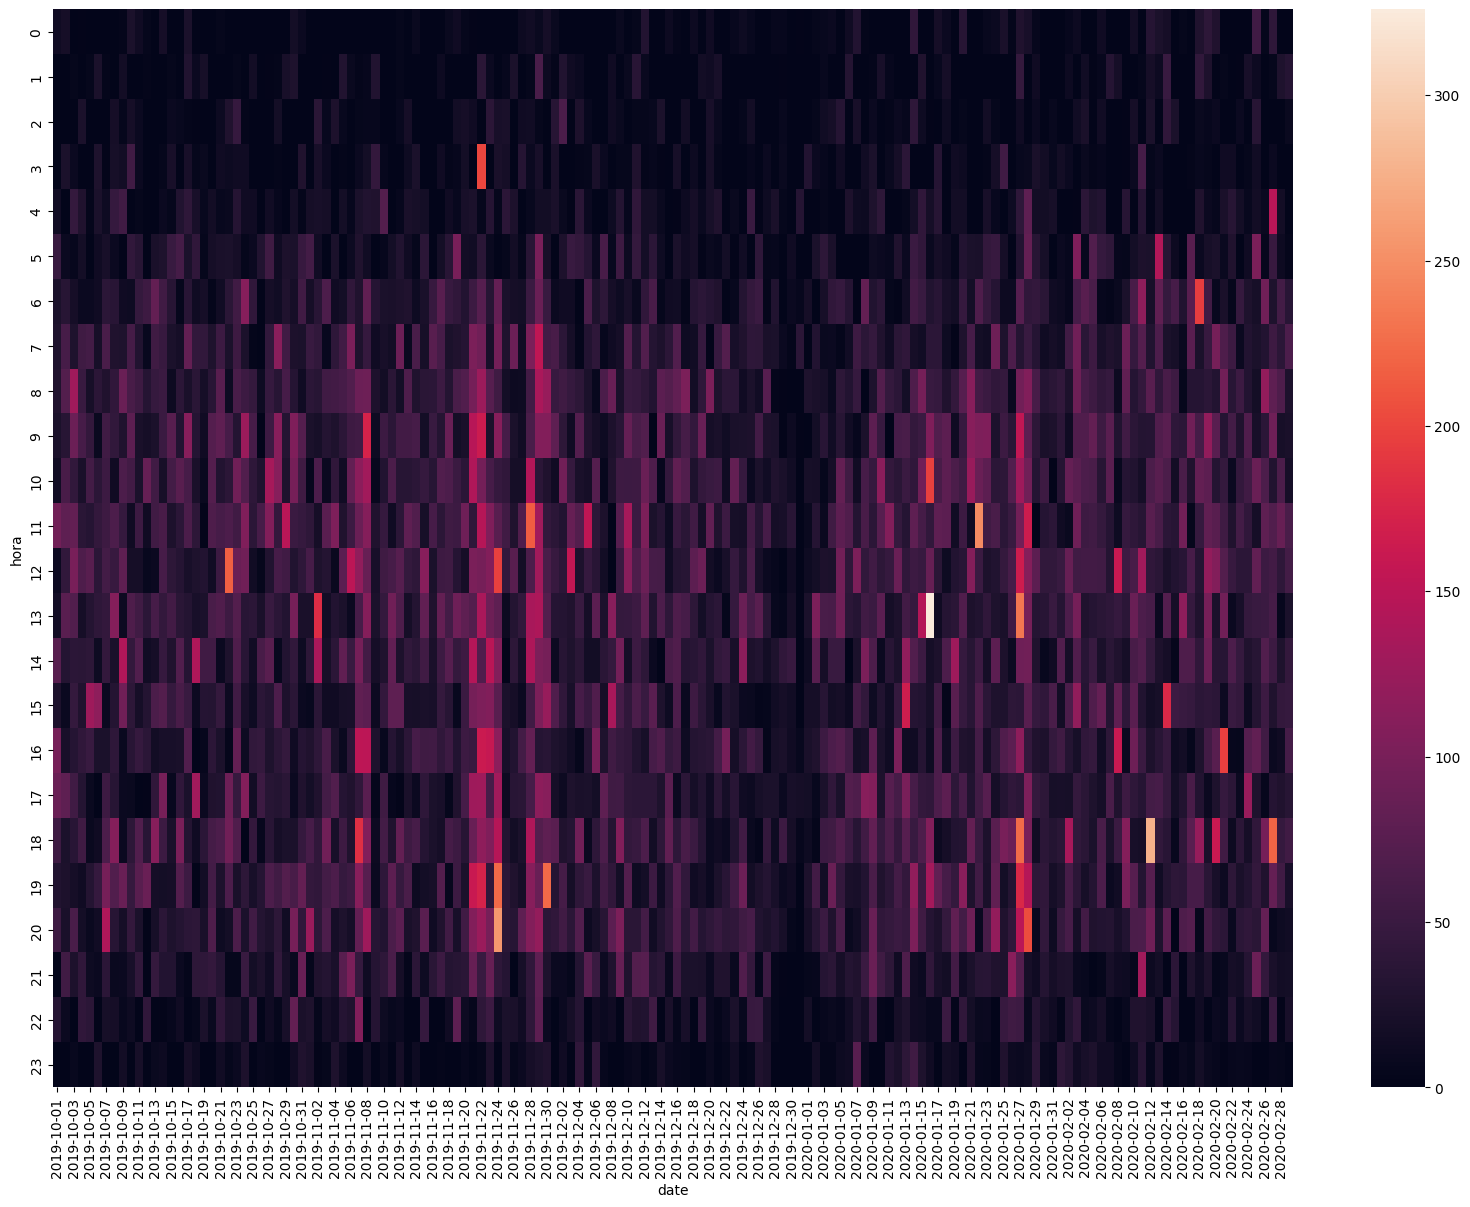

In [49]:
plt.figure(figsize = (20,14))
sns.heatmap(compras_dia_hora);

# 7. Analisi clientes

In [52]:
clientes=df.loc[df.evento=='purchase'].groupby('usuario').agg({'producto':'count',
                                                          'sesion':'nunique', 
                                                          'precio': 'mean',
                                                          'date': 'max'})
clientes

,producto,sesion,precio,date
usuario,,,,
25392526,3,1,7.38,2019-12-18
27756757,1,1,20.63,2020-01-27
50748978,9,1,1.11,2019-12-14
52747911,3,1,7.67,2019-10-10
65241811,5,1,8.36,2019-11-11
...,...,...,...,...
621995551,5,1,2.09,2020-02-29
622021687,1,1,13.33,2020-02-29
622041514,3,1,0.63,2020-02-29


In [53]:
clientes.columns = ['productos_tot_num','compras_tot_num','precio_medio_prod','ult_compra']
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ult_compra
usuario,,,,
25392526,3,1,7.38,2019-12-18
27756757,1,1,20.63,2020-01-27
50748978,9,1,1.11,2019-12-14
52747911,3,1,7.67,2019-10-10
65241811,5,1,8.36,2019-11-11
...,...,...,...,...
621995551,5,1,2.09,2020-02-29
622021687,1,1,13.33,2020-02-29
622041514,3,1,0.63,2020-02-29


In [54]:
clientes['gasto_tot'] = clientes.productos_tot_num * clientes.precio_medio_prod
clientes['productos_por_compra'] = clientes.productos_tot_num / clientes.compras_tot_num
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ult_compra,gasto_tot,productos_por_compra
usuario,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00
27756757,1,1,20.63,2020-01-27,20.63,1.00
50748978,9,1,1.11,2019-12-14,10.01,9.00
52747911,3,1,7.67,2019-10-10,23.02,3.00
65241811,5,1,8.36,2019-11-11,41.79,5.00
...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00
622021687,1,1,13.33,2020-02-29,13.33,1.00
622041514,3,1,0.63,2020-02-29,1.90,3.00


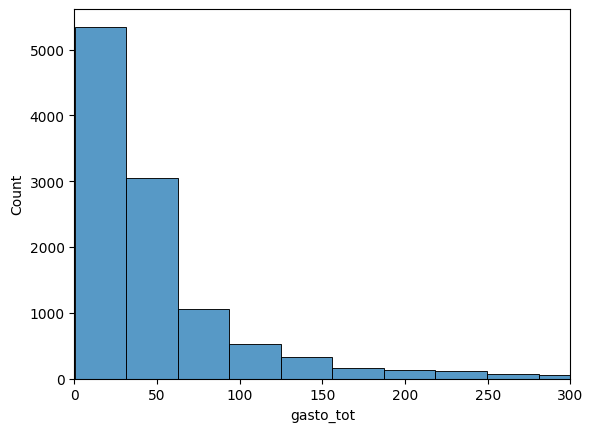

In [55]:
sns.histplot(data = clientes, x = 'gasto_tot', bins = 50)
plt.xlim([0,300]);

La mayoria de clientes ha gastado menos de 50euros en la compra.

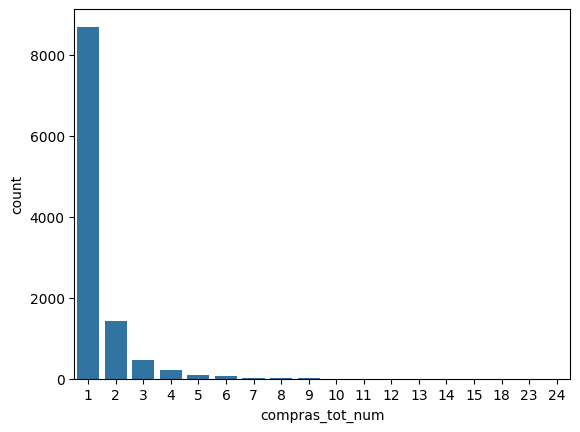

In [62]:
sns.countplot(data = clientes, x = 'compras_tot_num');

### INSIGHT 3 La gran mayoría de los clientes sólo hace una compra.

Existe gran recorrido para mejorar este ratio mediante:

email marketing con newletters y ofertas personalizadas

<Axes: xlabel='gasto_total_disc'>

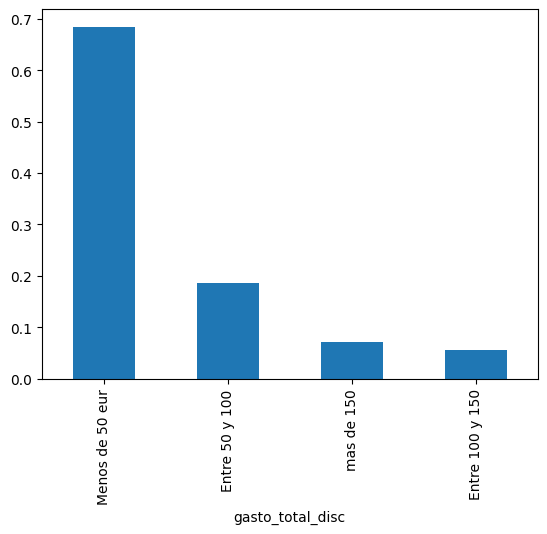

In [74]:
cortes=[-float("inf"),50,100,150,float("inf")]
nombres=['Menos de 50 eur','Entre 50 y 100','Entre 100 y 150','mas de 150']

clientes['gasto_total_disc']=pd.cut(clientes.gasto_tot,cortes,labels=nombres)
clientes.gasto_total_disc.value_counts(normalize=True).plot.bar()

In [57]:
clientes.productos_por_compra.describe()
#Compra de clientes

count   11,040.00
mean         7.79
std          9.49
min          1.00
25%          3.00
50%          5.00
75%         10.00
max        219.00
Name: productos_por_compra, dtype: float64

### **INSIGHT #4** La compra mediana incluye 5 productos.

Pero un 25% de los clientes compran más de 10 productos en la misma compra.

Comprar 219 productos podría ser una empresa que vende en su tienda/web?

# 8. Ingresos

In [60]:
clientes.nlargest(columns='gasto_tot',n=10)

,productos_tot_num,compras_tot_num,precio_medio_prod,ult_compra,gasto_tot,productos_por_compra
usuario,,,,,,
573823111,268,2,5.82,2020-02-21,"1,559.21",134.00
539751397,236,13,6.16,2020-02-19,"1,453.37",18.15
556579890,506,4,2.75,2020-02-27,"1,392.45",126.50
442763940,195,8,6.37,2019-12-23,"1,241.53",24.38
561592095,94,3,11.81,2019-10-31,"1,109.70",31.33
527739278,244,13,4.39,2020-02-16,"1,071.00",18.77
527806771,195,13,4.86,2020-02-20,948.01,15.00
430220205,190,6,4.99,2020-02-29,947.30,31.67
491009486,219,1,4.32,2020-02-12,946.20,219.00


In [61]:
clientes.gasto_tot.describe()

count   11,040.00
mean        56.30
std         81.73
min          0.13
25%         16.22
50%         32.74
75%         60.30
max      1,559.21
Name: gasto_tot, dtype: float64

**INSIGHT #5** Existen clientes con gasto medio decenas de veces superior a la media.

Hay que fidelizar estos clientes mediante programas de fidelización.